In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завантажити власні файли
data = pd.read_csv('GlobalWeatherRepository.csv', delimiter=',', encoding='latin1')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7206 entries, 0 to 7205
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       7206 non-null   object 
 1   location_name                 7206 non-null   object 
 2   latitude                      7206 non-null   float64
 3   longitude                     7206 non-null   float64
 4   timezone                      7206 non-null   object 
 5   last_updated_epoch            7206 non-null   int64  
 6   last_updated                  7206 non-null   object 
 7   temperature_celsius           7206 non-null   float64
 8   temperature_fahrenheit        7206 non-null   float64
 9   condition_text                7206 non-null   object 
 10  wind_mph                      7206 non-null   float64
 11  wind_kph                      7206 non-null   float64
 12  wind_degree                   7206 non-null   int64  
 13  win

In [2]:
# Збережіть альтернативний масив. Визначте наявність пропущених даних. Видаліть рядки з пропущеними значеннями.
alternative_data = pd.DataFrame(data)

# Визначення пропущених значень
missing_data = alternative_data.isnull().sum()
print(missing_data)

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [3]:
# Видалення рядків з пропущеними значеннями
alternative_data.dropna(inplace=True)
print(alternative_data.isnull().sum())

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

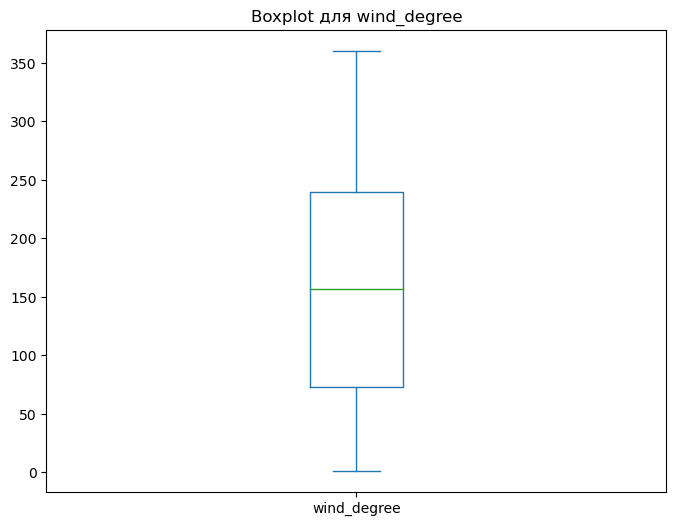

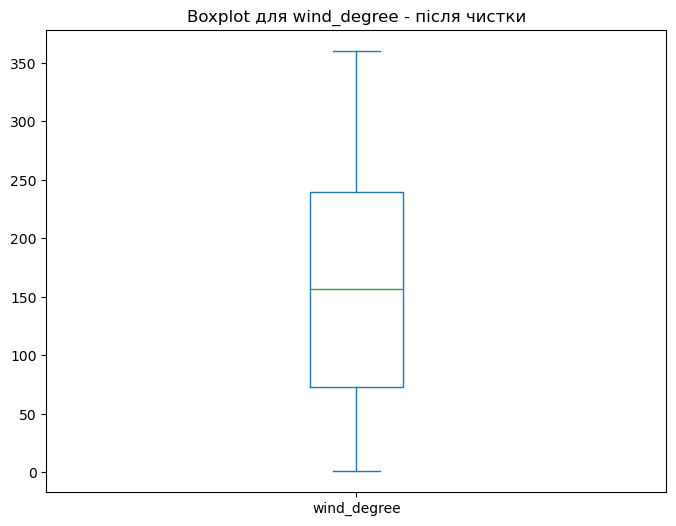

In [4]:
# Визначте наявність «викидів» та приберіть їх з досліджуваного масиву (за допомогою функції boxplot або термокарт).
# У випадку їх відсутності – діяти аналогічно попередньому пункту.
# Побудова boxplot для визначення викидів
plt.figure(figsize=(8, 6))
alternative_data['wind_degree'].plot(kind='box')
plt.title('Boxplot для wind_degree')
plt.show()

# Визначення викидів за допомогою міжквартильного діапазону
Q1 = alternative_data['wind_degree'].quantile(0.25)
Q3 = alternative_data['wind_degree'].quantile(0.75)
IQR = Q3 - Q1

# Визначення верхньої та нижньої межі для викидів
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Прибирання викидів
alternative_data = alternative_data[(alternative_data['wind_degree'] >= lower_bound) & (alternative_data['wind_degree'] <= upper_bound)]

# Побудова boxplot для визначення викидів
plt.figure(figsize=(8, 6))
alternative_data['wind_degree'].plot(kind='box')
plt.title('Boxplot для wind_degree - після чистки')
plt.show()

In [5]:
# Перерахуйте показники описової статистики для отриманого масиву.
description_after_outlier_removal = alternative_data.describe()
description_after_outlier_removal

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,7206.000000,7206.000000,7.206000e+03,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,...,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000
mean,19.302764,21.896077,1.694820e+09,22.316292,72.169914,6.620552,10.654940,162.531224,1013.694005,29.933392,...,17.111990,529.237566,41.153428,11.210505,6.541035,22.017624,35.752415,1.507216,2.144602,56.593672
std,24.584166,65.661512,9.181562e+05,6.686802,12.036563,4.660107,7.501077,103.697540,5.907479,0.174278,...,10.875722,1252.426976,32.337796,20.279766,14.455035,62.683618,84.724427,0.936952,2.256714,37.015698
min,-41.300000,-175.200000,1.693301e+09,-5.000000,23.000000,2.200000,3.600000,1.000000,982.000000,29.000000,...,0.000000,96.800000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.840000,1.694041e+09,17.100000,62.800000,3.100000,5.000000,73.000000,1010.000000,29.830000,...,9.000000,223.600000,17.700000,1.100000,0.400000,3.200000,5.600000,1.000000,1.000000,22.000000
50%,17.250000,23.240000,1.694817e+09,23.000000,73.400000,5.600000,9.000000,157.000000,1013.000000,29.910000,...,15.100000,270.400000,37.200000,3.900000,1.500000,7.900000,13.300000,1.000000,1.000000,63.000000
75%,41.330000,50.580000,1.695593e+09,27.000000,80.600000,9.400000,15.100000,240.000000,1017.000000,30.030000,...,22.700000,427.300000,57.200000,12.200000,5.700000,19.600000,31.900000,2.000000,2.000000,93.000000
max,63.830000,179.220000,1.696369e+09,45.000000,113.000000,48.500000,78.100000,360.000000,1036.000000,30.590000,...,110.500000,36315.898000,320.400000,329.000000,169.800000,1558.800000,1859.600000,6.000000,10.000000,100.000000


In [6]:
# Выбираем только числовые колонки для нормализации
numeric_columns = alternative_data.select_dtypes(include=[np.number]).columns

# Сохраняем другие данные (нечисловые)
other_data = alternative_data.drop(numeric_columns, axis=1)

# Проводим операции центрирования и нормирования только для числовых колонок
centered_data = alternative_data[numeric_columns] - alternative_data[numeric_columns].mean()
standard_devs = alternative_data[numeric_columns].std()
normalized_data = centered_data / standard_devs

# Соединяем данные обратно с другими данными
normalized_df = pd.concat([other_data, normalized_data], axis=1)
normalized_df.info()

#Обчислення дисперсії та суми всіх елементів отриманих масивів
# Рассчет дисперсии и суммы элементов отнормированных массивов
variance_normalized = normalized_data.var(numeric_only=True)
sum_normalized = normalized_data.sum(numeric_only=True)

print('----------Normalized Variance-----------')
print(variance_normalized)
print('----------Sum of Normalized Data-----------')
print(sum_normalized)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7206 entries, 0 to 7205
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       7206 non-null   object 
 1   location_name                 7206 non-null   object 
 2   timezone                      7206 non-null   object 
 3   last_updated                  7206 non-null   object 
 4   condition_text                7206 non-null   object 
 5   wind_direction                7206 non-null   object 
 6   sunrise                       7206 non-null   object 
 7   sunset                        7206 non-null   object 
 8   moonrise                      7206 non-null   object 
 9   moonset                       7206 non-null   object 
 10  moon_phase                    7206 non-null   object 
 11  latitude                      7206 non-null   float64
 12  longitude                     7206 non-null   float64
 13  las

In [7]:
#Нормування даних
normalized_data = centered_data / standard_devs

In [8]:
normalized_df

,country,location_name,timezone,last_updated,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,Afghanistan,Kabul,Asia/Kabul,2023-08-29 14:00,Sunny,ENE,05:24 AM,06:24 PM,05:39 PM,02:48 AM,...,-0.350505,0.094427,2.753638,-0.493620,-0.424837,-0.225220,-0.290972,-0.541347,-0.507198,0.983538
1,Albania,Tirana,Europe/Tirane,2023-08-29 11:30,Partly cloudy,SSW,06:04 AM,07:19 PM,06:50 PM,03:25 AM,...,-0.479232,-0.076122,1.955810,-0.375276,-0.327985,0.098628,-0.072617,0.525943,0.379046,0.983538
2,Algeria,Algiers,Africa/Algiers,2023-08-29 10:30,Partly cloudy,WSW,06:16 AM,07:21 PM,06:46 PM,03:50 AM,...,-1.076893,0.094427,-0.759280,2.558683,0.419159,-0.249150,-0.328741,-0.541347,-0.507198,0.983538
3,Andorra,Andorra La Vella,Europe/Andorra,2023-08-29 11:30,Sunny,NNW,07:16 AM,08:34 PM,08:08 PM,04:38 AM,...,-0.479232,-0.270625,0.830192,-0.542931,-0.438673,-0.343273,-0.412542,-0.541347,-0.507198,0.983538
4,Angola,Luanda,Africa/Luanda,2023-08-29 10:30,Partly cloudy,W,06:11 AM,06:06 PM,04:43 PM,04:41 AM,...,-1.040114,1.283079,3.282431,2.050788,1.408434,1.875807,1.977559,2.660523,3.480901,0.983538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7201,Venezuela,Caracas,America/Caracas,2023-10-03 17:30,Partly cloudy,N,06:16 AM,06:17 PM,09:55 PM,10:08 AM,...,-0.635543,0.094427,2.045488,1.542892,4.694486,0.127344,-0.058453,0.525943,0.379046,0.740397
7202,Vietnam,Hanoi,Asia/Bangkok,2023-10-04 04:30,Partly cloudy,E,05:48 AM,05:43 PM,08:37 PM,09:30 AM,...,-0.892997,0.760733,-1.272611,2.287477,1.346172,1.748182,1.336658,2.660523,3.480901,0.740397
7203,Yemen,Sanaa,Asia/Aden,2023-10-04 00:30,Clear,NNE,05:53 AM,05:51 PM,09:05 PM,09:35 AM,...,0.072456,-0.294658,1.337338,-0.335828,0.391487,0.033220,0.643824,0.525943,0.379046,0.740397
7204,Zambia,Lusaka,Africa/Lusaka,2023-10-03 23:30,Clear,ENE,05:49 AM,06:04 PM,10:12 PM,08:44 AM,...,0.899987,0.408936,0.542603,-0.306241,-0.127363,-0.119930,-0.161139,-0.541347,-0.064076,0.740397


In [9]:
normalized_df.to_csv("GlobalWeather_NormData.csv")

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Зчитування CSV файлу та вивід даних
#data = pd.read_csv('spotify-2023-main.csv', delimiter=',', encoding='latin1')
data = pd.read_csv('GlobalWeather_NormData.csv', delimiter=',', encoding='latin1')

data.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
grouped_data = data[['location_name', 'temperature_celsius']]
grouped_data = data.groupby(['location_name', 'temperature_celsius'], as_index=False)['latitude'].mean(numeric_only=True)
grouped_data.head(15)

,location_name,temperature_celsius,latitude
0,'S-Gravenwezel,-1.991429,1.300318
1,'S-Gravenwezel,-1.841881,1.300318
2,'S-Gravenwezel,-1.692332,1.300318
3,'S-Gravenwezel,-1.542784,1.300318
4,'S-Gravenwezel,-1.393236,1.300318
5,'S-Gravenwezel,-1.243688,1.300318
6,'S-Gravenwezel,-1.094139,1.300318
7,'S-Gravenwezel,-0.944591,1.300318
8,'S-Gravenwezel,-0.795043,1.300318
9,'S-Gravenwezel,-0.645494,1.300318


In [12]:
sorted_grouped_data = grouped_data.sort_values(by='temperature_celsius', ascending=False)
sorted_grouped_data

,location_name,temperature_celsius,latitude
18,Abu Dhabi,3.392310,0.210186
806,Djibouti,2.943665,-0.313322
2262,Riyadh,2.943665,0.217101
1334,Kuwait City,2.868891,0.409501
657,Carreria,2.794117,-1.661751
...,...,...,...
2615,Ulaanbaatar,-3.486912,1.164051
665,Chi-Chi-Erh,-3.576641,1.317809
2614,Ulaanbaatar,-3.636461,1.164051
2613,Ulaanbaatar,-3.935557,1.164051


In [13]:
pd.crosstab(data['location_name'], data['temperature_celsius'])

temperature_celsius,-4.085106,-3.935557,-3.636461,-3.576641,-3.486912,-3.337364,-3.187816,-3.113042,-3.068177,-3.053222,...,2.360427,2.375382,2.390337,2.465111,2.539885,2.584750,2.794117,2.868891,2.943665,3.392310
location_name,,,,,,,,,,,,,,,,,,,,,
'S-Gravenwezel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abu Dhabi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Abuja,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Accra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Addis Ababa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wellington,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Windhoek,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yaren,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Гістограма
    plt.subplot(2, 2, 1)
    df[variable].hist()
    
    # Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    
    # Boxplot
    plt.subplot(2, 2, 3)
    sns.boxplot(x = df[variable])
    
    fig.suptitle(title)
    plt.show()

C:\Users\amigo\AppData\Local\Temp\ipykernel_13672\4270301791.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


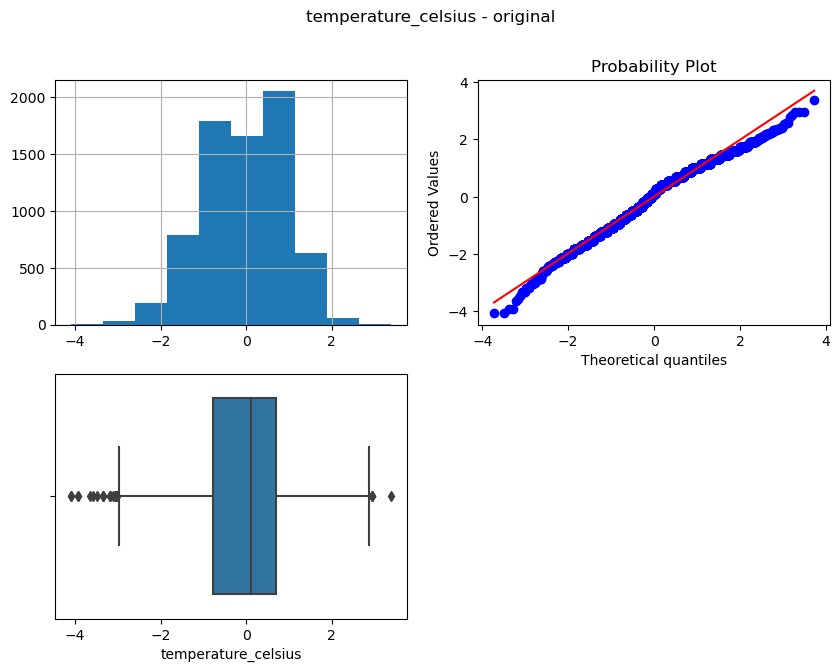

In [15]:
diagnostic_plots(data, 'temperature_celsius', 'temperature_celsius - original')

In [16]:
from scipy.stats import kstest, norm
import numpy as np

ks_statistic, ks_p_value = kstest(data['temperature_celsius'], 'norm')

alpha = 0.05

# Перевірка 
if ks_p_value < alpha:
    print("Не нормальний розподіл")
else:
    print("Нормальний розподіл")

# Вивід
print("K-S Statistic:", ks_statistic)
print("P-value:", ks_p_value)

Не нормальний розподіл
K-S Statistic: 0.08999928350936859
P-value: 3.0712218919377004e-51


C:\Users\amigo\AppData\Local\Temp\ipykernel_13672\4270301791.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


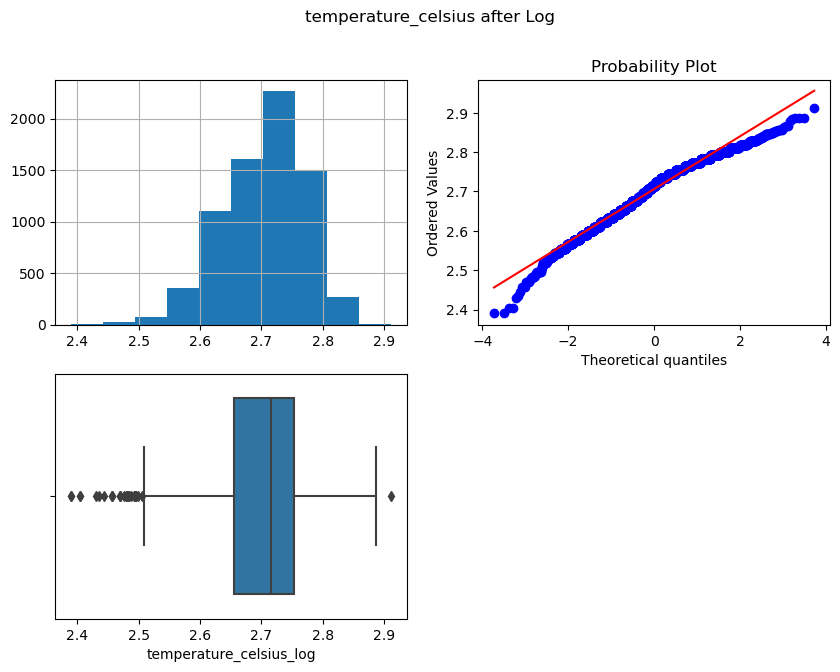

Не нормальний розподіл
K-S Statistic: 0.9920115537257722
P-value: 0.0


In [17]:
alternative_data = data

alternative_data['temperature_celsius_log'] = np.log(alternative_data['temperature_celsius'] + 15)
diagnostic_plots(alternative_data, 'temperature_celsius_log', 'temperature_celsius after Log')

# Знову за К-тестом перевірка
ks_statistic, ks_p_value = kstest(alternative_data['temperature_celsius_log'], 'norm')

alpha = 0.05

# Перевірка 
if ks_p_value < alpha:
    print("Не нормальний розподіл")
else:
    print("Нормальний розподіл")

# Вивід
print("K-S Statistic:", ks_statistic)
print("P-value:", ks_p_value)

C:\Users\amigo\AppData\Local\Temp\ipykernel_13672\4270301791.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


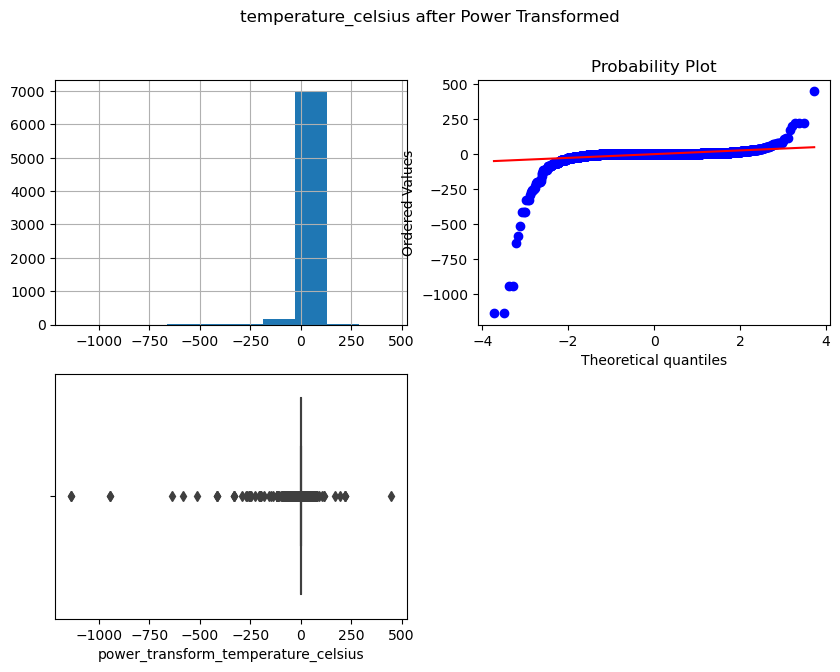

Не нормальний розподіл
K-S Statistic: 0.19393798072727447
P-value: 6.735159395274935e-238


In [18]:
alternative_data = data

# Степеневе перетворення ознаки 
alternative_data['power_transform_temperature_celsius'] = alternative_data['temperature_celsius'] ** 5
diagnostic_plots(alternative_data, 'power_transform_temperature_celsius', 'temperature_celsius after Power Transformed')

# Знову за К-тестом перевірка
ks_statistic, ks_p_value = kstest(alternative_data['power_transform_temperature_celsius'], 'norm')

alpha = 0.05

# Перевірка 
if ks_p_value < alpha:
    print("Не нормальний розподіл")
else:
    print("Нормальний розподіл")

# Вивід
print("K-S Statistic:", ks_statistic)
print("P-value:", ks_p_value)

C:\Users\amigo\AppData\Local\Temp\ipykernel_13672\4270301791.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


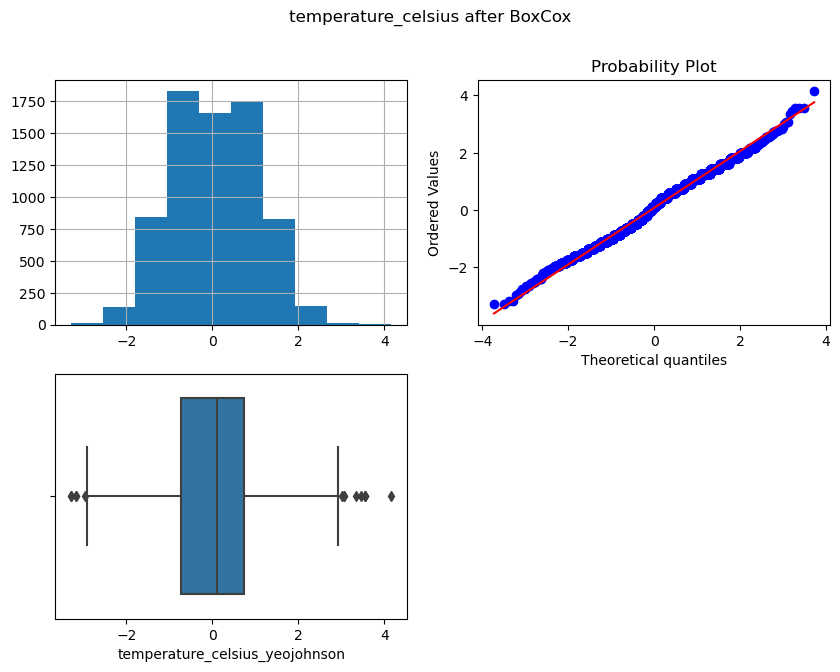

Не нормальний розподіл
K-S Statistic: 0.09589656462119411
P-value: 3.958876190956492e-58


In [19]:
from scipy.stats import yeojohnson

alternative_data = data

# Застосування Yeo-Johnson трансформації
alternative_data['temperature_celsius_yeojohnson'], _ = yeojohnson(alternative_data['temperature_celsius'])

diagnostic_plots(alternative_data, 'temperature_celsius_yeojohnson', 'temperature_celsius after BoxCox')

# Знову за К-тестом перевірка
ks_statistic, ks_p_value = kstest(alternative_data['temperature_celsius_yeojohnson'], 'norm')

alpha = 0.05

# Перевірка 
if ks_p_value < alpha:
    print("Не нормальний розподіл")
else:
    print("Нормальний розподіл")

# Вивід
print("K-S Statistic:", ks_statistic)
print("P-value:", ks_p_value)

In [20]:
from scipy.stats import boxcox
import numpy as np

alternative_data = data

# Perform the Box-Cox transformation
const = 10
released_year_data = alternative_data['temperature_celsius'] + const
transformed_data, best_lambda = boxcox(released_year_data)

alternative_data['boxcox_transformed_in_apple_charts'] = np.where(alternative_data['temperature_celsius'].notnull(), transformed_data, np.nan)


ks_statistic, ks_p_value = kstest(alternative_data['boxcox_transformed_in_apple_charts'], 'norm')

alpha = 0.05


if ks_p_value < alpha:
    print("Не нормальний розподіл")
else:
    print("Нормальний розподіл")
    

print("K-S Statistic:", ks_statistic)
print("P-value:", ks_p_value)


Не нормальний розподіл
K-S Statistic: 1.0
P-value: 0.0


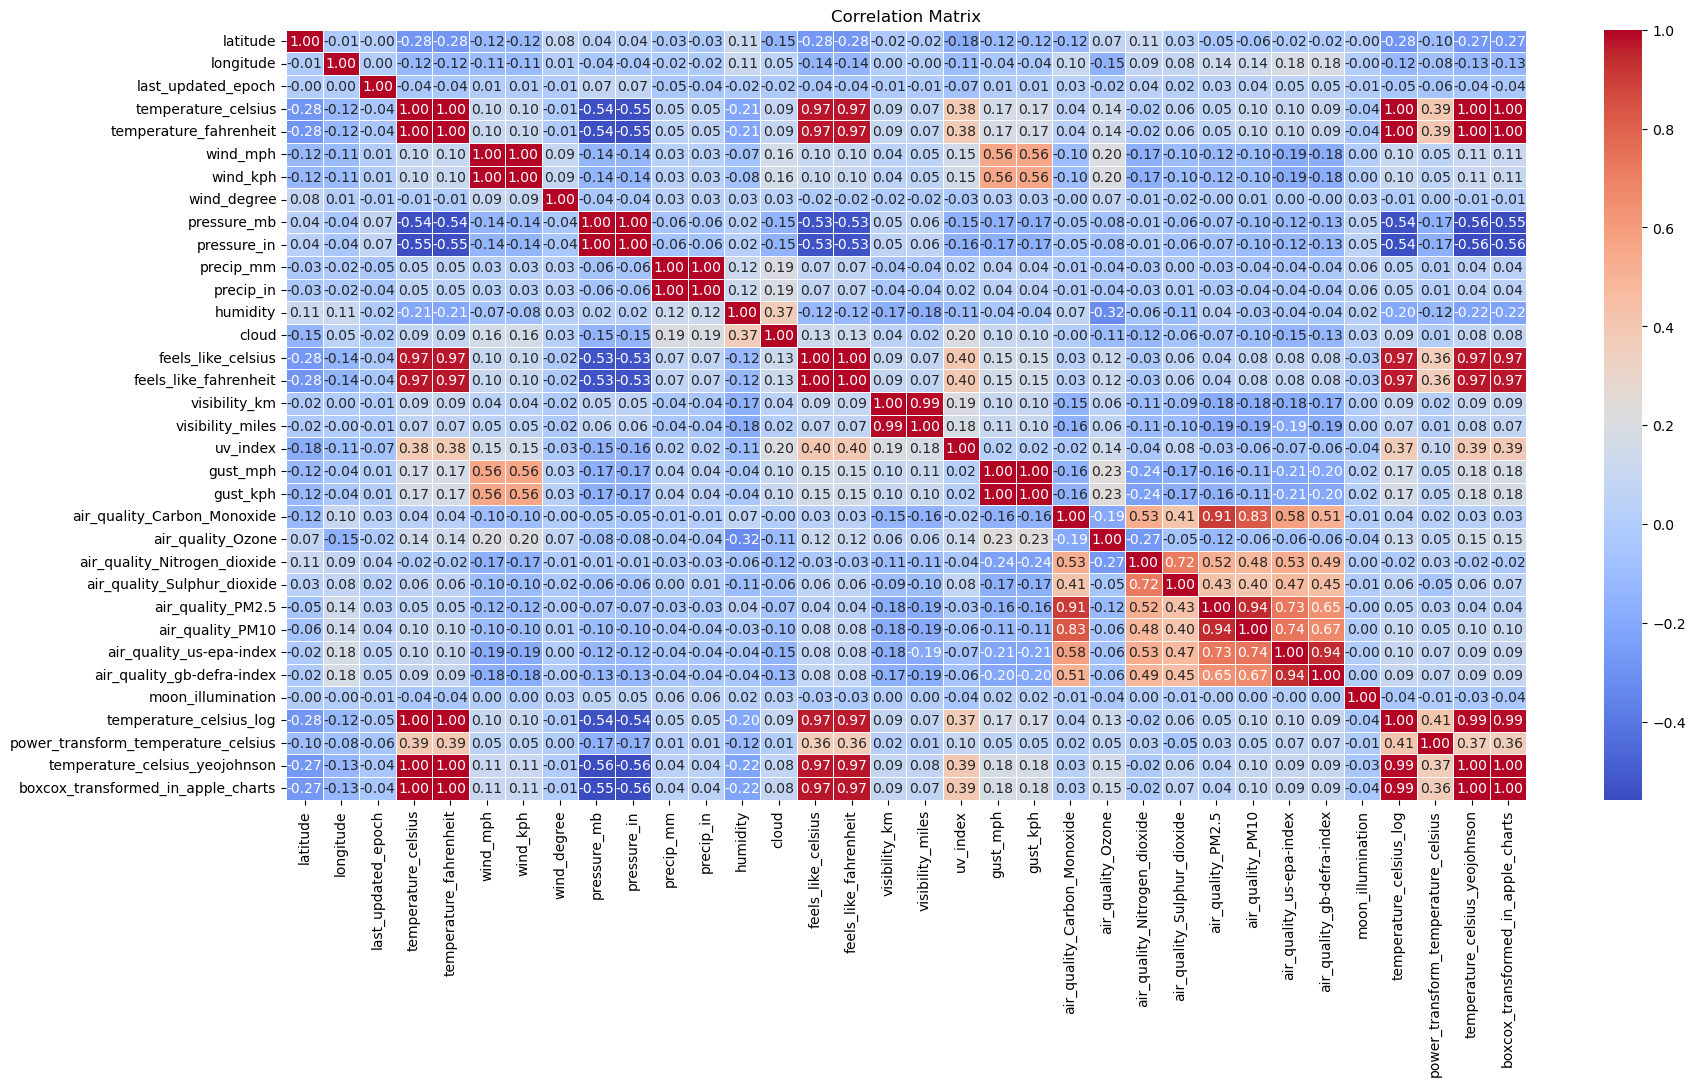

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислення кореляційної матриці
correlation_matrix = data.corr(numeric_only=True)

# Візуалізація кореляційної матриці у вигляді теплокарти (heatmap)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
data.to_csv("GlobalWeather_EDA_data.csv")

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Зчитування даних з файлу
data = pd.read_csv('GlobalWeather_EDA_data.csv', encoding="latin1", delimiter=",");

# Видалення зайвої ознаки
data = data.drop(columns="Unnamed: 0")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7206 entries, 0 to 7205
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7206 non-null   object 
 1   location_name                        7206 non-null   object 
 2   timezone                             7206 non-null   object 
 3   last_updated                         7206 non-null   object 
 4   condition_text                       7206 non-null   object 
 5   wind_direction                       7206 non-null   object 
 6   sunrise                              7206 non-null   object 
 7   sunset                               7206 non-null   object 
 8   moonrise                             7206 non-null   object 
 9   moonset                              7206 non-null   object 
 10  moon_phase                           7206 non-null   object 
 11  latitude                      

In [24]:
# Розбиття ознак
X = data[['temperature_celsius', 'wind_degree', 'cloud']]
Y = data['condition_text']

In [25]:
# Розбиття dataset на тренувальні та тестові дані за допомогою train_test_split, який ми імпортували
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Імпорт бібліотек для побудови Дерева Рішень
from sklearn.tree import DecisionTreeClassifier

# Використання моделі рішень (Decision Tree) з максимальною глибиною 2.
dtree = DecisionTreeClassifier(random_state=10)

# Модель навчається (fit) на тренувальних даних (X_train, y_train),
# після чого робить передбачення (predict) для тренувальних даних (train_predictions)
# та тестових даних (test_predictions).
dtree.fit(X_train, y_train)

print("Навчальна вибірка:")
print(dtree.score(X_train, y_train))

print("Тестова вибірка:")
print(dtree.score(X_test, y_test))

Навчальна вибірка:
0.9397303727200634
Тестова вибірка:
0.7192414431082331


In [35]:
another_dtree = DecisionTreeClassifier(max_depth=7)
another_dtree.fit(X_train, y_train)

print("Навчальна вибірка:")
print(another_dtree.score(X_train, y_train))

print("Тестова вибірка:")
print(another_dtree.score(X_test, y_test))

Навчальна вибірка:
0.8275178429817605
Тестова вибірка:
0.803422756706753


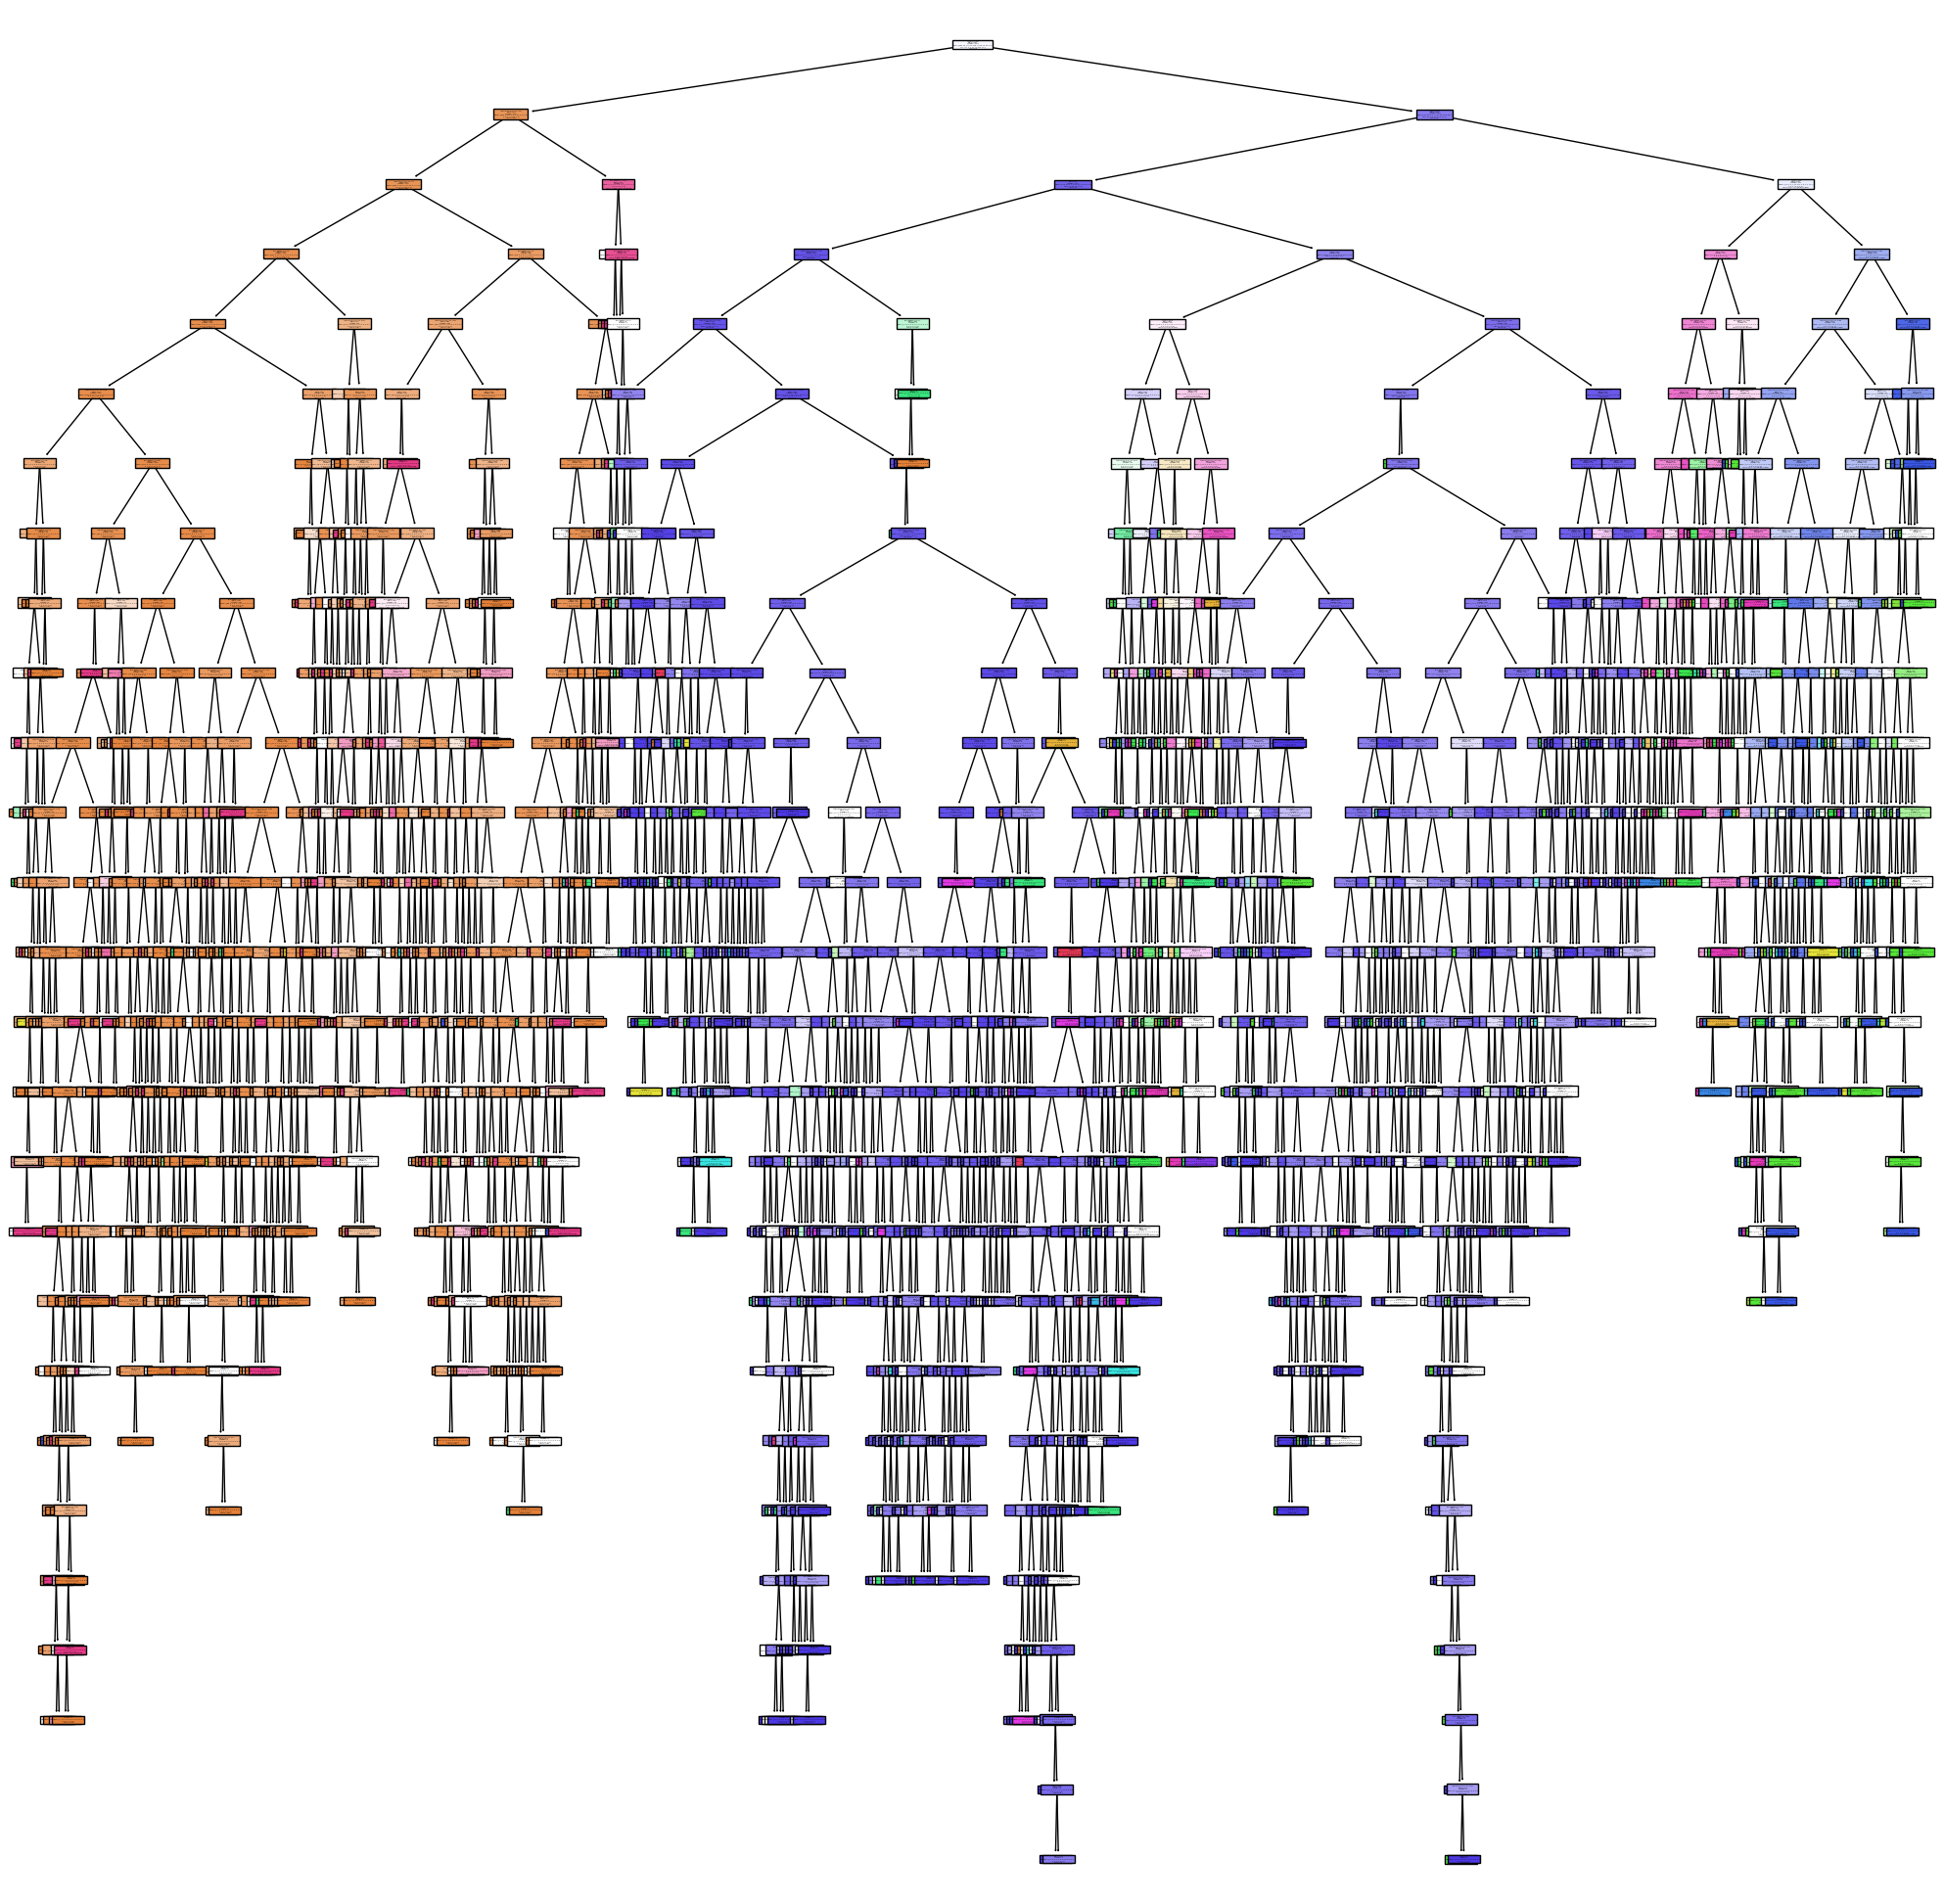

In [36]:
# Імпорт для побудови (графічно) Дерева Рішень
from sklearn.tree import plot_tree

# Get unique class names from the 'condition_text' column
class_names = data['condition_text'].unique()

# Convert class_names to a list
class_names = class_names.tolist() if isinstance(class_names, np.ndarray) else class_names

# Visualize the decision tree
plt.figure(figsize=(25, 25))
plot_tree(dtree, filled=True, feature_names=X.columns.tolist(), class_names=class_names)
plt.show()



In [37]:
# 6. Підбір оптимальних параметрів моделі
best_train_acc = 0
best_test_acc = 0
best_max_depth = 1

for depth in range(1, 11):
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train, y_train)
    
    train_acc = dtree.score(X_train, y_train)
    test_acc = dtree.score(X_test, y_test)
    
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_max_depth = depth


print("Best Train Accuracy:", best_train_acc)
print("Best Test Accuracy:", best_test_acc)
print("Best Max Depth:", best_max_depth)

Best Train Accuracy: 0.8166137985725614
Best Test Accuracy: 0.8061979648473635
Best Max Depth: 5


In [38]:
# 7. Обрізка та перебудова дерева з оптимальною глибиною
pruned_dtree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=2)

# Перебудова дерева з оптимальною глибиною
pruned_dtree.fit(X_train, y_train)

# 8. Оцінка параметрів "оптимальної моделі"
print("Train Accuracy (pruned):", pruned_dtree.score(X_train, y_train))
print("Test Accuracy (pruned):", pruned_dtree.score(X_test, y_test))

Train Accuracy (pruned): 0.8166137985725614
Test Accuracy (pruned): 0.8052728954671601


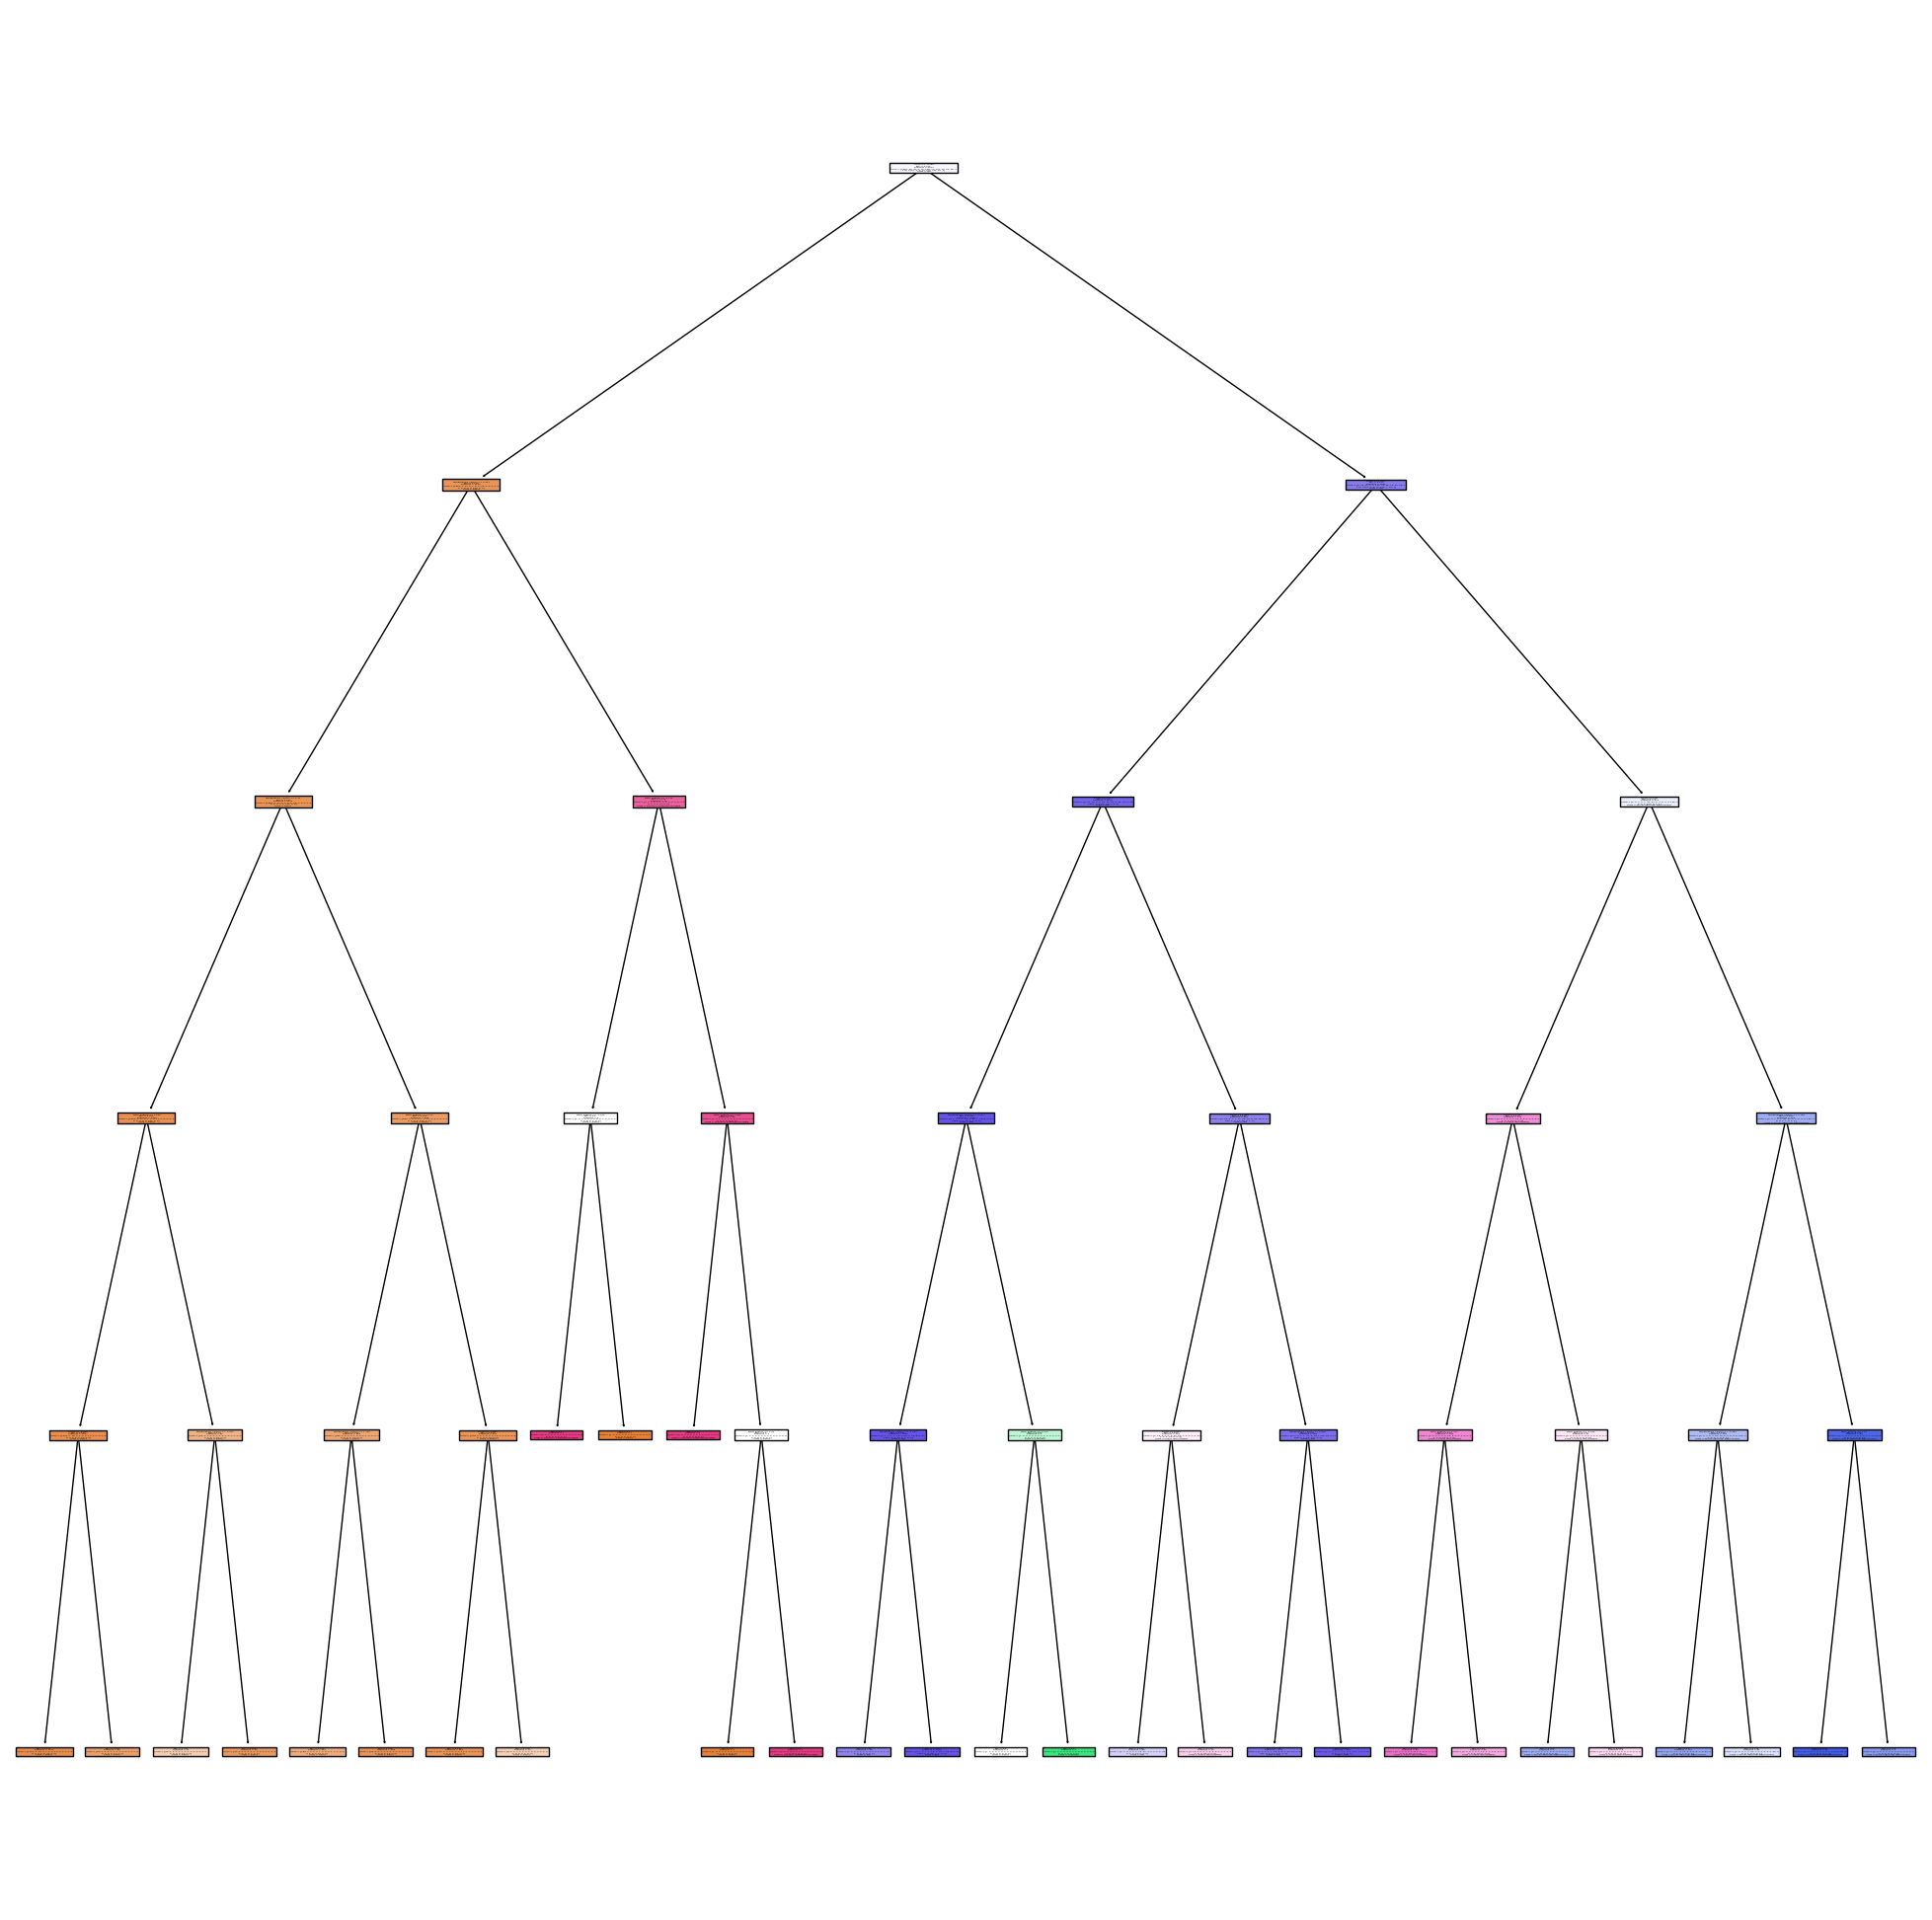

In [39]:
# Імпорт для побудови (графічно) Дерева Рішень
from sklearn.tree import plot_tree

# Get unique class names from the 'condition_text' column
class_names = data['condition_text'].unique()

# Convert class_names to a list
class_names = class_names.tolist() if isinstance(class_names, np.ndarray) else class_names

# Visualize the decision tree
plt.figure(figsize=(25, 25))
plot_tree(pruned_dtree, filled=True, feature_names=X.columns.tolist(), class_names=class_names)
plt.show()



In [40]:
# Важливість ознак для кінцевої моделі після обрізки та перебудови
feature_importance = pruned_dtree.feature_importances_

# Створення DataFrame для зручного відображення важливості ознак
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Виведення важливості ознак
print("Важливість ознак у кінцевій моделі:")
feature_importance_df

Важливість ознак у кінцевій моделі:


,Feature,Importance
2,cloud,0.972237
0,temperature_celsius,0.018415
1,wind_degree,0.009348
